# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Reading in files the easy way

The previous procedure to read in files is nice if we have to handle data we don't know the format of.
For standard formats such as `csv` one can make use of the rich python ecosystem by using third party libraries such as `pandas`.

To have access to code from the pandas project we need to import the module. In the python community it is convention to abbreviate pandas as pd.
Then we can make use of the pandas function `read_csv`.

In [1]:
import pandas as pd

In [2]:
pandas_squares = pd.read_csv('squares.csv', header=None)
pandas_squares.head() # only display the first few elements

,0,1
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


The data read in this way will be stored in a so-called `DataFrame`.
The columns will be just numbered sequentially, but we can name them like we want.
We then can select the values similar to a dictionary.

In [3]:
pandas_squares.columns = ['number', 'squared']
pandas_squares.head() # only display the first 5 elements

,number,squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [4]:
pandas_squares['squared'].head()

0     1
1     4
2     9
3    16
4    25
Name: squared, dtype: int64

We can even perform calculations between the individual columns of the `DataFrame`.

In [5]:
pandas_squares['divided_by_10'] = pandas_squares['squared'] / 10
pandas_squares['difference'] = pandas_squares['squared'] - pandas_squares['number']

pandas_squares.tail() # only display the last 5 elements

,number,squared,divided_by_10,difference
95,96,9216,921.6,9120
96,97,9409,940.9,9312
97,98,9604,960.4,9506
98,99,9801,980.1,9702
99,100,10000,1000.0,9900


`pandas` offers many more features that can make data analysis a breeze, so you may want to have a look at their [documentation](https://pandas.pydata.org/docs/) for many more useful functions.

In [6]:
pandas_squares.describe()

,number,squared,divided_by_10,difference
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3383.500000,338.350000,3333.000000
std,29.011492,3024.355854,302.435585,2996.256553
min,1.000000,1.000000,0.100000,0.000000
25%,25.750000,663.250000,66.325000,637.500000
50%,50.500000,2550.500000,255.050000,2500.000000
75%,75.250000,5662.750000,566.275000,5587.500000
max,100.000000,10000.000000,1000.000000,9900.000000


# Plotting with Python

To analyze data, tables can be handy, but for more complex data, this can get messy soon. For this, visualizing the data in plots is an important skill.
We will once again make use of the rich python ecosystem and use the library `matplotlib`.
Again we import the module `pyplot` abbreviated as `plt`.

Below are some basic plot types and how you can create them with matplotlib.

In [7]:
import matplotlib.pyplot as plt

## Bar chart

<BarContainer object of 4 artists>

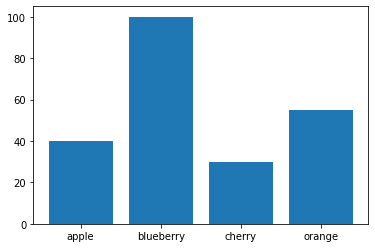

In [8]:
counts = [40, 100, 30, 55]
labels = ['apple', 'blueberry', 'cherry', 'orange']

plt.bar(labels, counts)

# Pie chart

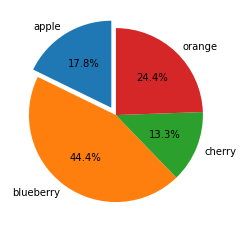

In [9]:
pie = plt.pie(x=counts, labels=labels, 
              explode=(0.1, 0, 0, 0), 
              startangle=90, 
              autopct='%1.1f%%',  # displaying and formatting the percentage inside the piece of pie
             )

## Scatter plot

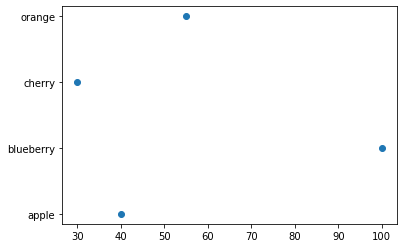

In [10]:
plt.scatter(counts, labels)

## Line plot

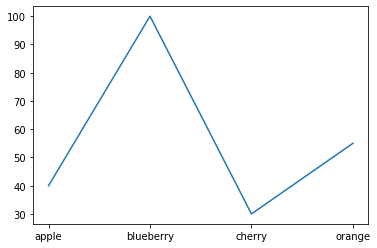

In [11]:
plt.plot(labels, counts)

## Plotting the data read in with Pandas and Matplotlib

To visualize our data, we can again use Matplotlib as before.

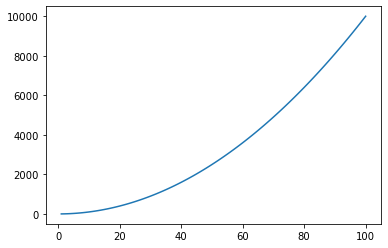

In [12]:
# as line plot
plt.plot(pandas_squares['number'], pandas_squares['squared'])

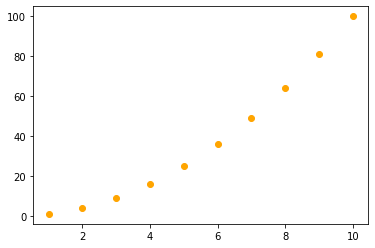

In [13]:
# as scatter plot
plt.scatter(pandas_squares['number'][:10], # here we only select the first 10 entries
            pandas_squares['squared'][:10], # ditto
            color='orange') # and choose the color orange

Don't be intimidated by the code below!

In line 1 we create a figure and an axis on which we are going to plot. So now instead of functions from `plt` as before, we use methods that are associated to the `ax` object.

The lines starting from line 15 add a legend, extra axis labels and a title.

The last line which is commented out, can save the plot to a filename specified.

Text(0.5, 0.98, 'from 1 to 10')

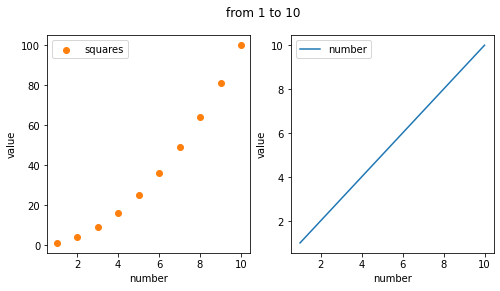

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.scatter(pandas_squares['number'][:10], 
           pandas_squares['squared'][:10],
           color='tab:orange',
           label = 'squares'
           )

ax2.plot(pandas_squares['number'][:10],
        pandas_squares['number'][:10], # here we choose the very same value again for the y value
        color='tab:blue', # so its easily distinguishable, we choose a different color
        label = 'number' # and add a label for a legend
        )

for ax in (ax1, ax2):
    ax.legend() # this way we can have a legend with the labels we added in the plotting functions before
    ax.set_xlabel('number')
    ax.set_ylabel('value')
fig.suptitle('from 1 to 10')
# fig.savefig('squares.png')

For many examples showcasing different kind of plots, the [matplotlib website](https://matplotlib.org/) can be of great use.

## Plot directly from Pandas

Pandas is pretty cool and has some of the basic plot types implemented for their DataFrames.

<AxesSubplot:>

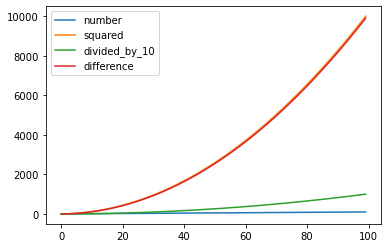

In [15]:
pandas_squares.plot()

<AxesSubplot:xlabel='number', ylabel='squared'>

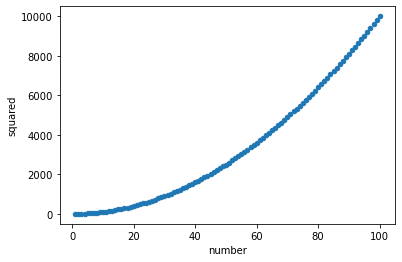

In [18]:
pandas_squares.plot(kind='scatter', x='number', y='squared')

<AxesSubplot:ylabel='Frequency'>

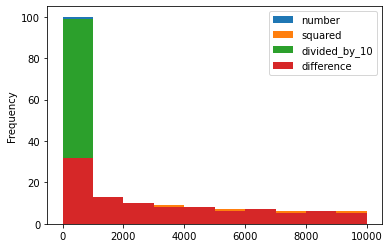

In [19]:
pandas_squares.plot(kind='hist')

# Exercise

Recall the function you wrote to calculate the grades.
You have data from an online exam where 300 people took part and need to do the following tasks for your supervisor:

- read in the data from the file `exam_results.csv`
- compute the average and median score
- assign grades to each student using your function from 3_collections.py
- visualize the exam results in a bar or pie chart

## reading in the data

In [44]:
exam_results = pd.read_csv('exam_results.csv')
exam_results.head() # only display the first few elements
#print(exam_results['points'][1])

,student_id,points
0,1,23.5/24
1,2,19.5/24
2,3,2.0/24
3,4,15.0/24
4,5,22.0/24


## compute the average and median score

In [28]:
def average(values):
    avg_value = sum(values)/len(values)
    return avg_value

In [29]:
assert average([1,2,3]) == 2
assert average([1,2,3,4]) == 2.5
assert average([4,1,3,2]) == 2.5

In [65]:
def median(values):
    values.sort()
    if len(values) % 2 == 0:
        median_value = (values [int((len(values)/2))] + values[int((len(values)/2)-1)])/2
    else:
        median_value = values[int((len(values)-1)/2)]
    return median_value

In [66]:
assert median([1,2,3]) == 2
assert median([1,2,3,4]) == 2.5
assert median([4,1,3,2]) == 2.5

## assign grades to each student

In [74]:
def calculate_grade(achieved_points, total_points=24):
    if achieved_points/total_points*100 >= 87.5:
        grade = 1
    elif achieved_points/total_points*100 >= 75:
         grade = 2
    elif achieved_points/total_points*100 >= 62.5:
         grade = 3
    elif achieved_points/total_points*100 >= 50:
         grade = 4
    else:
         grade = 5
    return grade

In [75]:
assert calculate_grade(24, 24) == 1
assert calculate_grade(87.5, 100) == 1
assert calculate_grade(9, 10) == 1
assert calculate_grade(8, 10) == 2
assert calculate_grade(5, 10) == 4

In [107]:
grades = []
achievedList = [i.split ('/',1)[0] for i in exam_results['points']]
#print(achievedList)
#print(exam_results['points'])
for i in (exam_results['points']):
    achieved, total = i.split('/')
    achieved = float(achieved)
    total = float(total)
    grades.append(calculate_grade(achieved, total))

## visualize the results in a bar / pie chart

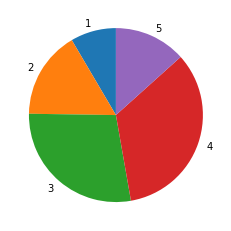

In [108]:
gradeLabels = [1,2,3,4,5]
gradeCount = [grades.count(1),grades.count(2),grades.count(3),grades.count(4),grades.count(5)]

gradepie = plt.pie(x=gradeCount, labels=gradeLabels, 
              startangle=90
             )